In [1]:
# import pandas
import pandas as pd

import pymongo 

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

# import rcParams and set the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# import KMeans from sklearn
from sklearn.cluster import KMeans

In [2]:
client = pymongo.MongoClient('localhost')
customers = client.spring.customers



In [3]:
# read the data
cursor = customers.find()
entries = list(cursor)


df_customer = pd.DataFrame(entries)

#df_customer = pd.read_csv('mall_customers.csv')

# print first five rows of data
df_customer.head()

,_id,gender,age,income,score,_class
0,61dc73af760cc88b8a98098d,Female,44,66.0,22,com.sim.springboot.models.Customer
1,61dc73af760cc88b8a98098e,Male,21,15.0,81,NaN
2,61dc73af760cc88b8a98098f,Female,23,16.0,77,NaN
3,61dc73af760cc88b8a980990,Female,31,17.0,40,NaN
4,61dc73af760cc88b8a980991,Female,20,16.0,6,NaN


In [4]:
# check the shape of the data
df_customer.shape

(200, 6)

In [5]:
# check the data types of the variables
df_customer.dtypes

_id        object
gender     object
age         int64
income    float64
score       int64
_class     object
dtype: object

In [6]:
# check for missing values
df_customer.isnull().sum()

_id         0
gender      0
age         0
income      0
score       0
_class    199
dtype: int64

In [7]:
# drop unwanted column
df_customer.drop(['_id'], axis=1, inplace=True)

In [8]:
# filter the numerical variables
df_num = df_customer.select_dtypes(include=np.number)
#df_num = df_customer[['Annual Income', 'Spending Score (1-100)','Age']]

# print the first three rows of the data
df_num.head(3)

,age,income,score
0,44,66.0,22
1,21,15.0,81
2,23,16.0,77


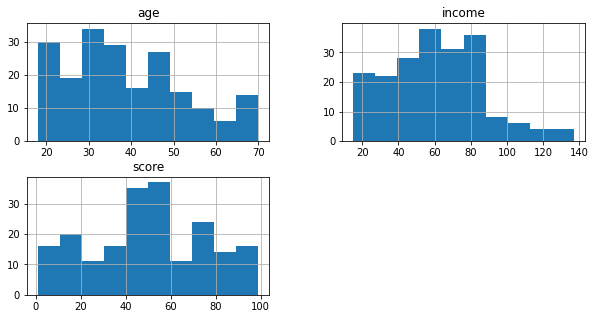

In [9]:
# create a histogram for numerical variables
hists = df_num.hist()

# diaplay the plot
plt.show()

<AxesSubplot:>

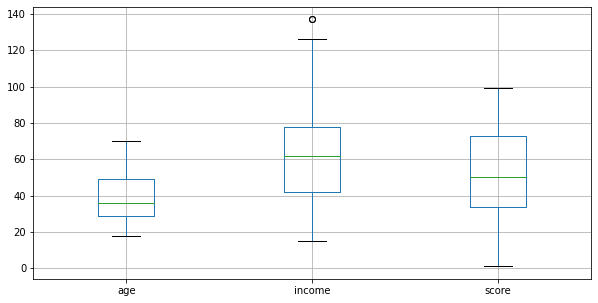

In [10]:
# create a boxplot for numeric variables
df_num.boxplot()

**Gender distribution**

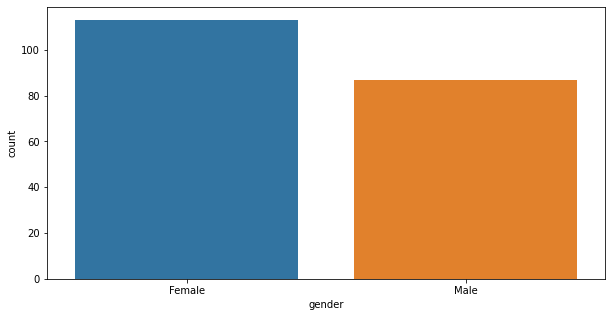

In [11]:
# create a countplot
sns.countplot(x='gender', data=df_customer)
# display the plot
plt.show()

**Average anual income by gender**

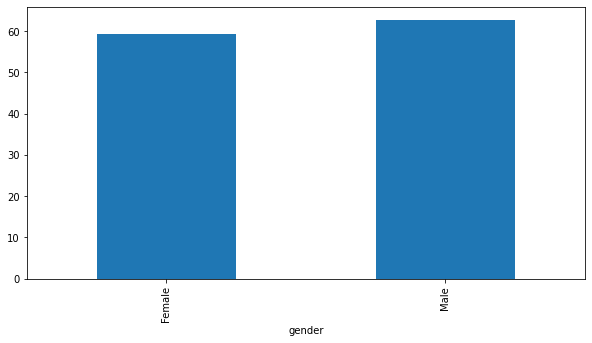

In [12]:
# create a barplot
df_customer.groupby('gender')['income'].mean().plot(kind='bar')
# display the plot
plt.show()

**Average spending score by gender**

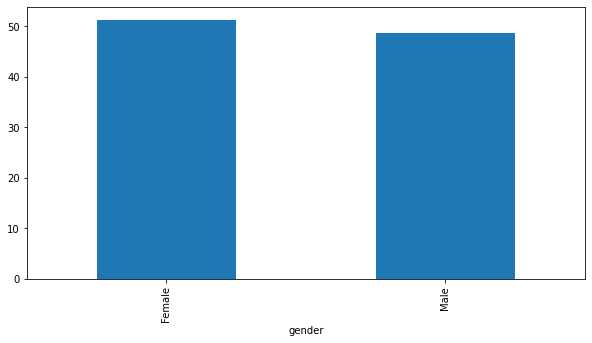

In [13]:
# create the barplot
df_customer.groupby('gender')['score'].mean().plot(kind='bar')
# display the plot
plt.show()

**Total spending score by gender**

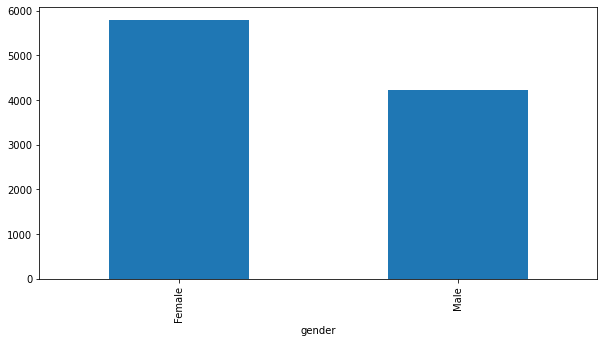

In [14]:
# create the barplot
df_customer.groupby('gender')['score'].sum().plot(kind='bar')
# display the plot
plt.show()

Text(0.5, 1.0, 'Histogram for Spending Score')

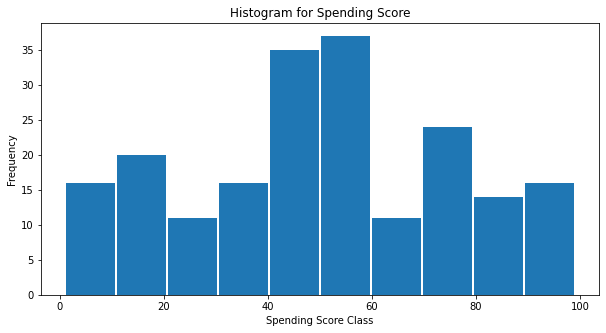

In [15]:
#my_bins=10
# Histogram used by deafult 10 bins
arr=plt.hist(df_customer['score'],bins=10, rwidth=0.95) 
# set label for x-axis
plt.xlabel('Spending Score Class')
# set label for y-axis
plt.ylabel('Frequency')
# set title of the graph
plt.title('Histogram for Spending Score')

### Model Building

**Customer segmentation using Annual Income and Spending Score**

In [16]:
# consider the variables
X = df_customer[['income', 'score']]

In [17]:
# create empty dictionary
#sse = {}
#for k in range(1, 11): # select the range for k 
    #kmeans = KMeans(n_clusters=k, random_state=42) # build the model
    # fit the model
    #kmeans.fit(X)
    #sse[k] = kmeans.inertia_ 

In [18]:
# set the label for x-axis
#plt.xlabel('K')
# set the label for y-axis
#plt.ylabel('Sum of Square Error(SSE)')
# plot the sse for different k values
#plt.plot(list(sse.keys()), list(sse.values()))

In [19]:
# build model for k=5
model = KMeans(n_clusters=5, random_state=42)
# fit the model
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [20]:
# predict the values
y_predicted = model.fit_predict(X)

In [21]:
# add the new column to the dataframe
df_customer['cluster'] = y_predicted
# display the dataframe
df_customer.head()

,gender,age,income,score,_class,cluster
0,Female,44,66.0,22,com.sim.springboot.models.Customer,3
1,Male,21,15.0,81,NaN,4
2,Female,23,16.0,77,NaN,4
3,Female,31,17.0,40,NaN,1
4,Female,20,16.0,6,NaN,1


In [22]:
# check the number of clusters
df_customer['cluster'].unique()

array([3, 4, 1, 2, 0])

In [23]:
# get all the values
X = X.values

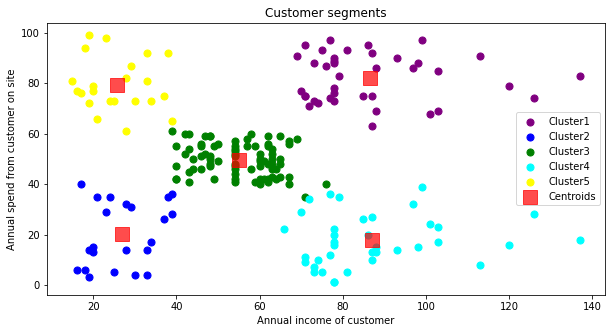

In [24]:
# Visualizing the clusters for k=5
plt.scatter(X[y_predicted==0,0],X[y_predicted==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_predicted==1,0],X[y_predicted==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_predicted==2,0],X[y_predicted==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_predicted==3,0],X[y_predicted==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_predicted==4,0],X[y_predicted==4,1],s=50, c='yellow',label='Cluster5')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()



In [25]:
model.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.81818182, 20.09090909],
       [55.0875    , 49.7125    ],
       [87.16216216, 17.7027027 ],
       [25.72727273, 79.36363636]])

<AxesSubplot:xlabel='cluster', ylabel='count'>

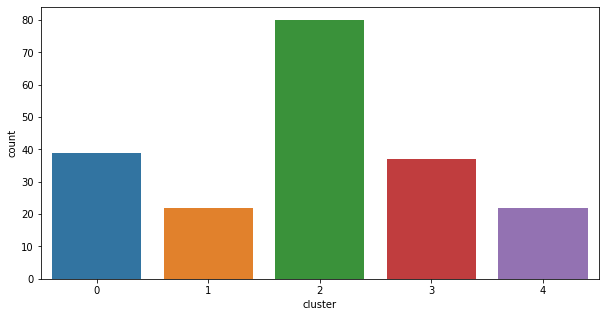

In [26]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df_customer, x = 'cluster')


In [27]:
# check the data type of the 'cluster'
df_customer['cluster'].dtypes

dtype('int32')

In [28]:
# change the data type
df_customer = df_customer['cluster'].astype(object)

In [29]:
# serializing our model to a file called model.pkl
import pickle
pickle.dump(model, open("model.pkl","wb"))